# Recap - Computer Vision

In [ ]:

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Sequential, Model
from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2
from PIL import Image


In [109]:
folder_path = "/Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning"

train_path = os.path.join(folder_path, "train")
valid_path = os.path.join(folder_path, "valid")
test_path = os.path.join(folder_path, "test")

In [110]:
result = 1569 / (1569 + 803)
result


0.6614671163575042

In [ ]:
def process_images(directory):

    for class_dir in ["0", "1"]:
        source_path = os.path.join(directory, class_dir)
        target_path = os.path.join(directory, f"{class_dir}_prep")

        os.makedirs(target_path, exist_ok=True)

        if os.path.exists(source_path):
            print(f"Traitement des images dans le dossier : {source_path}")
            for img_name in os.listdir(source_path):
                img_path = os.path.join(source_path, img_name)
                image = cv2.imread(img_path)
                if image is not None:

                    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    image_resized = cv2.resize(image_gray, (255, 255))

                    new_img_path = os.path.join(target_path, img_name)

                    cv2.imwrite(new_img_path, image_resized)
                else:
                    print(f"Erreur de chargement de l'image: {img_path}")
        else:
            print(f"Le dossier source n'existe pas : {source_path}")

for folder_name in ["test", "train", "valid"]:
    print(f"Traitement du dossier {folder_name}")
    process_images(os.path.join(folder_path, folder_name))

Traitement du dossier test
Traitement des images dans le dossier : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/test/0
Traitement des images dans le dossier : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/test/1
Traitement du dossier train
Traitement des images dans le dossier : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/0
Traitement des images dans le dossier : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/1
Traitement du dossier valid
Traitement des images dans le dossier : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/valid/0
Traitement des images dans le dossier : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/valid/1


In [ ]:
def retourner_images(dossier_base):

    categories = ['test', 'train', 'valid']

    for categorie in categories:
        for i in ['0_prep', '1_prep']:
            chemin_dossier = os.path.join(dossier_base, categorie, i)

            for fichier in os.listdir(chemin_dossier):
                if fichier.lower().endswith(('.png', '.jpg', '.jpeg')):
                    chemin_complet = os.path.join(chemin_dossier, fichier)

                    image = Image.open(chemin_complet)

                    image_retournee = image.transpose(Image.FLIP_LEFT_RIGHT)

                    base, extension = os.path.splitext(fichier)
                    nom_fichier_retourne = f"{base}_returned{extension}"
                    chemin_sauvegarde = os.path.join(chemin_dossier, nom_fichier_retourne)

                    image_retournee.save(chemin_sauvegarde)

            print(f"Toutes les images dans {chemin_dossier} ont été dupliquées, retournées et renommées.")

retourner_images(folder_path)

Toutes les images dans /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/test/0_prep ont été dupliquées, retournées et renommées.
Toutes les images dans /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/test/1_prep ont été dupliquées, retournées et renommées.
Toutes les images dans /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/0_prep ont été dupliquées, retournées et renommées.
Toutes les images dans /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/1_prep ont été dupliquées, retournées et renommées.
Toutes les images dans /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/valid/0_prep ont été dupliquées, retournées et renommées.
Toutes les images dans /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/valid/1_prep ont été dupliquées, retournées et renommées.


In [ ]:
import cv2
import numpy as np
import os

def ensure_folder_exists(folder):
    """ Assure que le dossier existe et crée si nécessaire. """
    if not os.path.exists(folder):
        try:
            os.makedirs(folder)
            print(f"Dossier créé : {folder}")
        except OSError as e:
            print(f"Erreur lors de la création du dossier {folder}: {e}")
            return False
    return True

def process_images(base_path):
    for folder in ['train', 'test', 'valid']:
        for sub_folder in ['0', '1']:
            input_folder = os.path.join(base_path, folder, sub_folder + '_prep')
            output_folder = os.path.join(base_path, folder, sub_folder + '_cropped')
            if not ensure_folder_exists(output_folder):
                continue

            for filename in os.listdir(input_folder):
                if filename.endswith(('.jpg', '.png')):
                    img_path = os.path.join(input_folder, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is None:
                        print(f"Échec de la lecture de l'image : {img_path}")
                        continue

                    _, thresh = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    if contours:
                        largest_contour = max(contours, key=cv2.contourArea)
                        mask = np.zeros_like(img)
                        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)
                        result = cv2.bitwise_and(img, img, mask=mask)
                        save_path = os.path.join(output_folder, filename)
                        cv2.imwrite(save_path, result)
                        print(f"Image croppée sauvegardée : {save_path}")
                    else:
                        print(f"Aucun contour trouvé dans l'image : {filename}")

    print("Traitement complet pour tous les dossiers.")

base_path = '/Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning'
process_images(base_path)

Dossier créé : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/0_cropped
Image croppée sauvegardée : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/0_cropped/2663_307174522_png.rf.de2d5749299977a0b6804d5a0b808420_returned.jpg
Image croppée sauvegardée : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/0_cropped/362_1204718288_png.rf.86bcd93ba99ee8b70045cd006c2ec332_returned.jpg
Image croppée sauvegardée : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/0_cropped/2009_1989704448_png.rf.5f2d749e1afba8f8874f1bc5f1045fff_returned.jpg
Image croppée sauvegardée : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learning/train/0_cropped/703_1458471363_png.rf.d02b1ffc0f7e9e76016c156d058da43e.jpg
Image croppée sauvegardée : /Users/florentcoulon/code/ThomasLechanoine/Breast_Cancer_Project/Data/Deep_learni

In [ ]:
print(len(os.listdir(f'{folder_path}/train/0')))
print(len(os.listdir(f'{folder_path}/train/1')))

1569
803


In [ ]:
train_dataset = image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="binary",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=123
)

validation_dataset = image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="binary",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="binary",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=123
)

Found 2372 files belonging to 2 classes.
Found 675 files belonging to 2 classes.
Found 336 files belonging to 2 classes.


In [71]:
from PIL import Image
from numpy import asarray

In [96]:
model = Sequential()

model.add(layers.Input((150, 150, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 146, 146, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,830,305 (26.06 MB)

 Trainable params: 6,830,305 (26.06 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','recall']
)

callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max'),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.6166 - loss: 1.3794 - recall: 0.2048

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - accuracy: 0.6171 - loss: 1.3658 - recall: 0.2024 - val_accuracy: 0.6637 - val_loss: 0.6495 - val_recall: 0.0000e+00
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.6545 - loss: 0.6634 - recall: 0.0250 - val_accuracy: 0.6637 - val_loss: 0.6414 - val_recall: 0.0000e+00
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.6606 - loss: 0.6557 - recall: 0.0546 - val_accuracy: 0.6622 - val_loss: 0.6336 - val_recall: 0.2159
Epoch 4/30
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.6604 - loss: 0.6512 - recall: 0.0947

75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - accuracy: 0.6607 - loss: 0.6510 - recall: 0.0952 - val_accuracy: 0.6711 - val_loss: 0.6575 - val_recall: 0.0396
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.6833 - loss: 0.6202 - recall: 0.1545 - val_accuracy: 0.6681 - val_loss: 0.6257 - val_recall: 0.1233
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.6575 - loss: 0.6386 - recall: 0.0699 - val_accuracy: 0.6667 - val_loss: 0.6232 - val_recall: 0.0352
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - accuracy: 0.6753 - loss: 0.6181 - recall: 0.1194 - val_accuracy: 0.6607 - val_loss: 0.6189 - val_recall: 0.1806
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - accuracy: 0.6836 - loss: 0.6134 - recall: 0.1683 - val_accuracy: 0.6652 - val_loss: 0.6198 - val_recall: 0.0881
Epoch 9/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - accuracy: 0.6871 - loss: 0.6144 - recall: 0.1650 - val_accuracy: 0.6652 - val_loss: 0.6184 - val_recall: 0.0132
Epoch 10/

In [77]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test accuracy:", test_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6056 - loss: 0.7702
Test accuracy: 0.6071428656578064


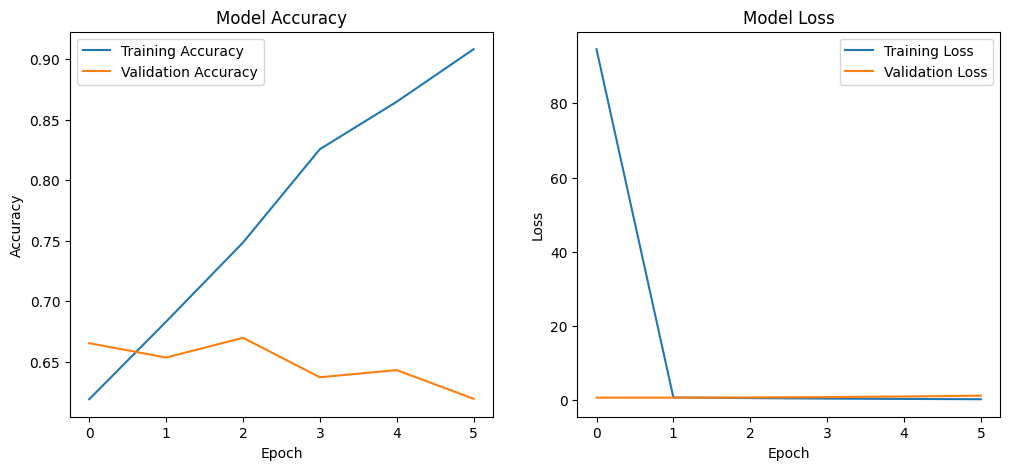

In [38]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Here we didn't use any pooling layers which gave us a super high amount of parameters ...